In [1]:
#导入必要的依赖库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
abs_path = os.path.abspath('.')
current_path = abs_path + '/tmp/pycharm_project_317/mutil_ML/'
train_data_path = current_path + 'train.csv'
test_data_path = current_path + 'test.csv'

In [8]:
# 读取数据集
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.shape

(1460, 81)

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
test.shape

(1459, 80)

In [14]:
print(train.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [15]:
train.describe() #数据描述

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
print(train.isnull().sum().sort_values(ascending=False)) # 打印表中各列空值的数量，并进行排序

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [17]:
# 计算空值NaN占比
train.isnull().sum().sort_values(ascending=False)/train.shape[0]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [18]:
# 将PoolQC、MiscFeature、Alley、Fence这几列删除
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [19]:
train.shape

(1460, 77)

In [20]:
test.shape

(1459, 76)

In [21]:
# 统计train,test所有列中的：数据类型的列 和分类类型的列
number_columns = [col for col in train.columns if train[col].dtype != 'object']

category_columns = [col for col in train.columns if train[col].dtype == 'object']

In [23]:
len(number_columns)

38

In [24]:
len(category_columns)

39

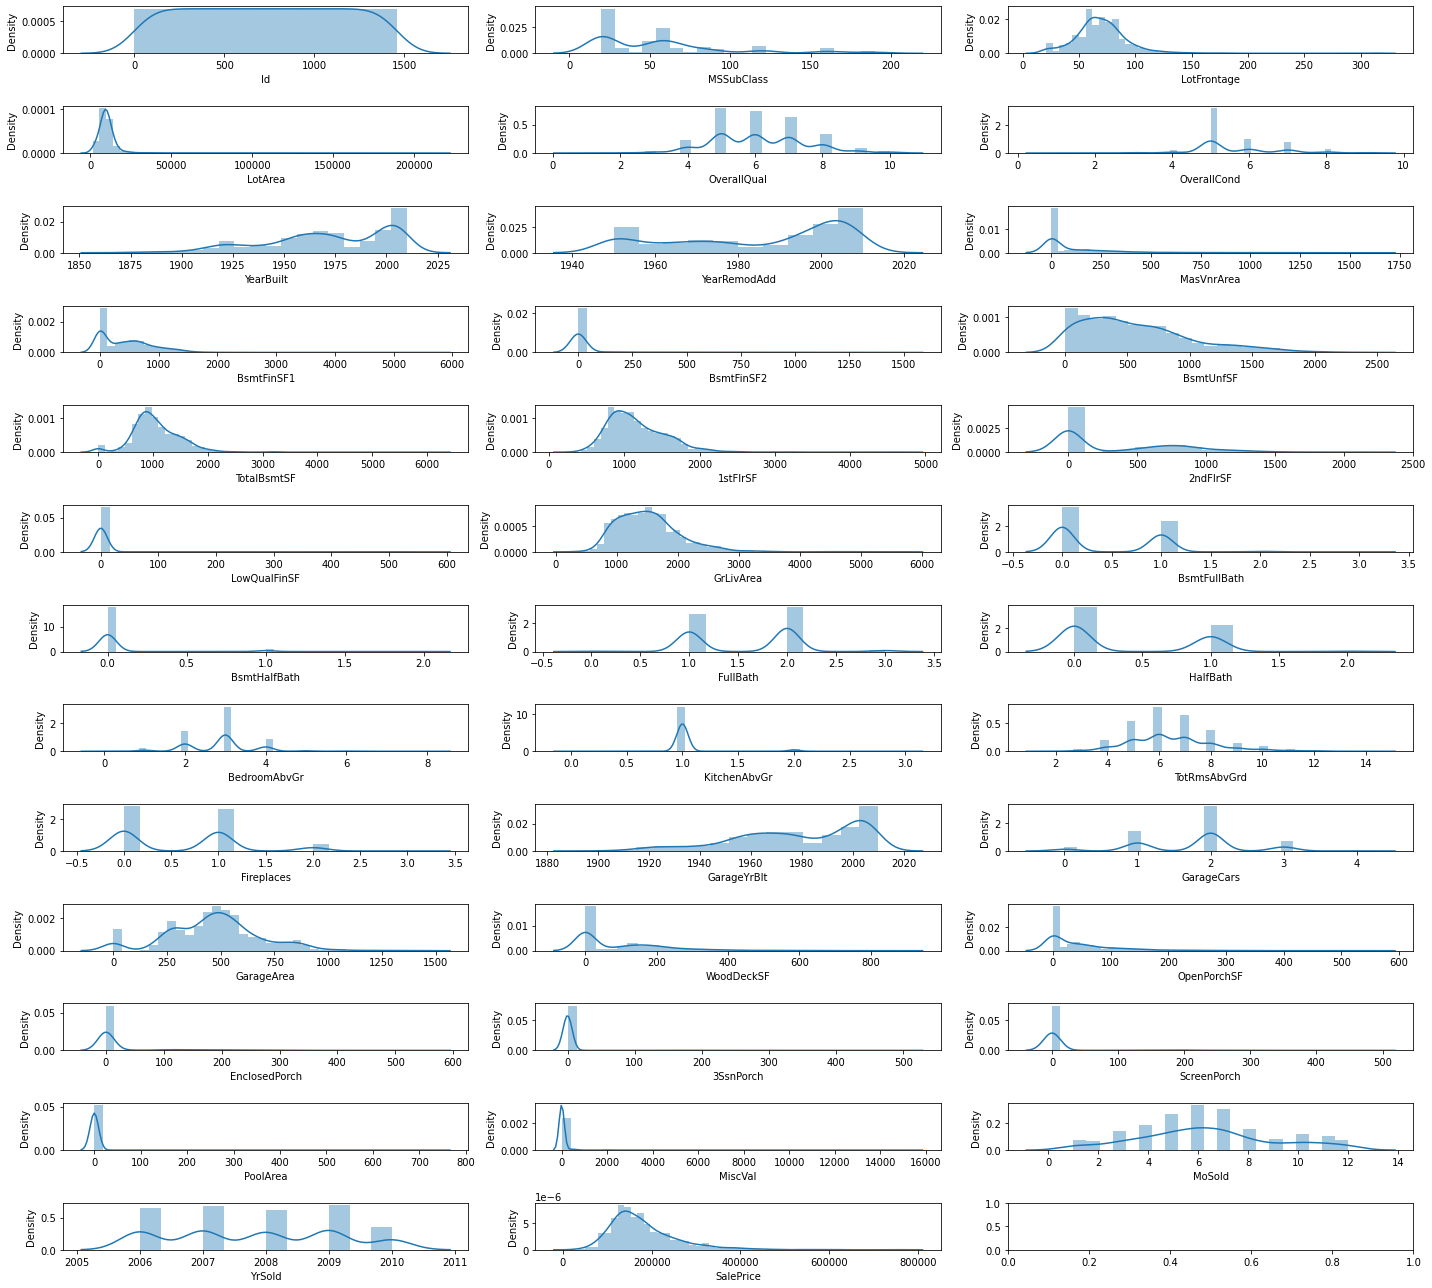

In [27]:
# 绘制显示数值类型列的数据分布
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in zip(range(len(number_columns)), number_columns):
    sns.distplot(train[col], ax=axes[i])
    plt.tight_layout()

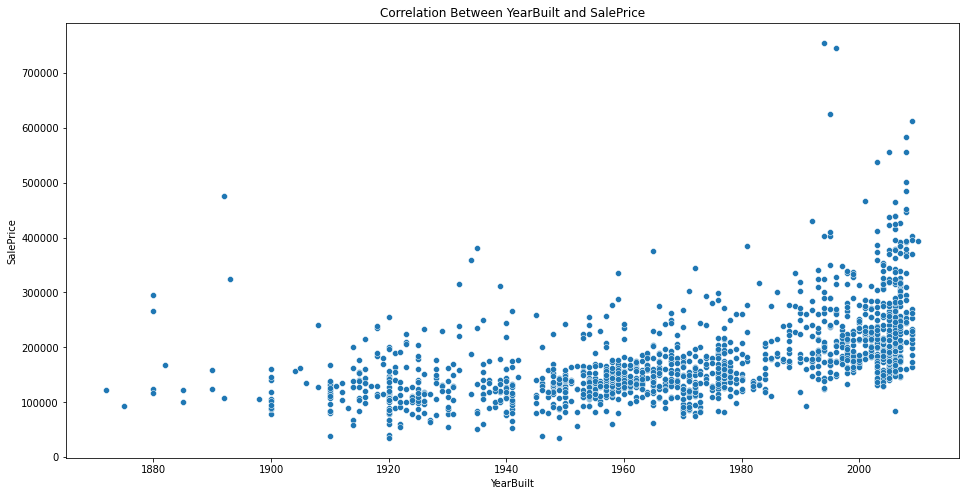

In [29]:
# 建造年份YearBuilt 与售价SalePrice 的关系
plt.figure(figsize=(16, 8)) # 画布大小
plt.title('Correlation Between YearBuilt and SalePrice')
sns.scatterplot(train.YearBuilt, train.SalePrice) #写法一
# sns.scatterplot(x='YearBuilt', y='SalePrice', data=train) # 写法二
plt.show()

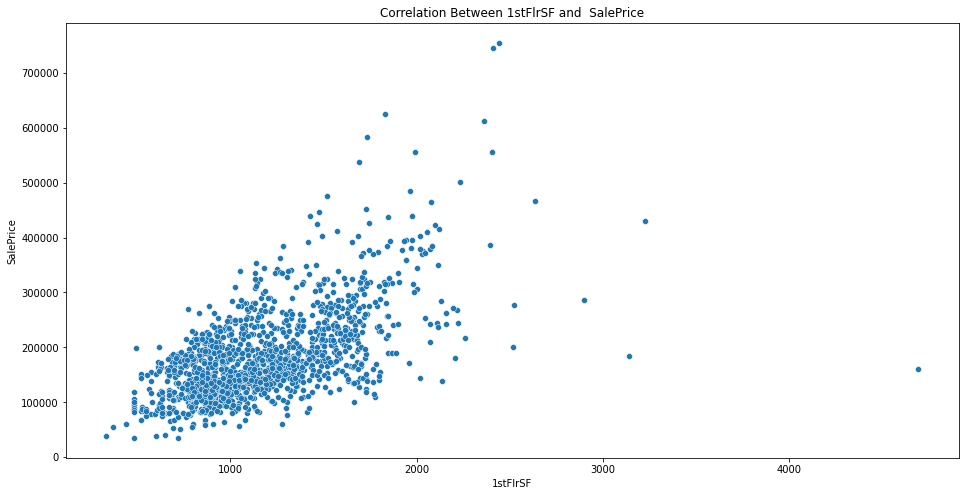

In [30]:
# 楼层面积1stFlrSF 与 售价SalePrice 的关系
plt.figure(figsize=(16, 8))
plt.title('Correlation Between 1stFlrSF and  SalePrice')
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)
plt.show()

In [31]:
# 显示 分类类型 数据
len(category_columns)

39

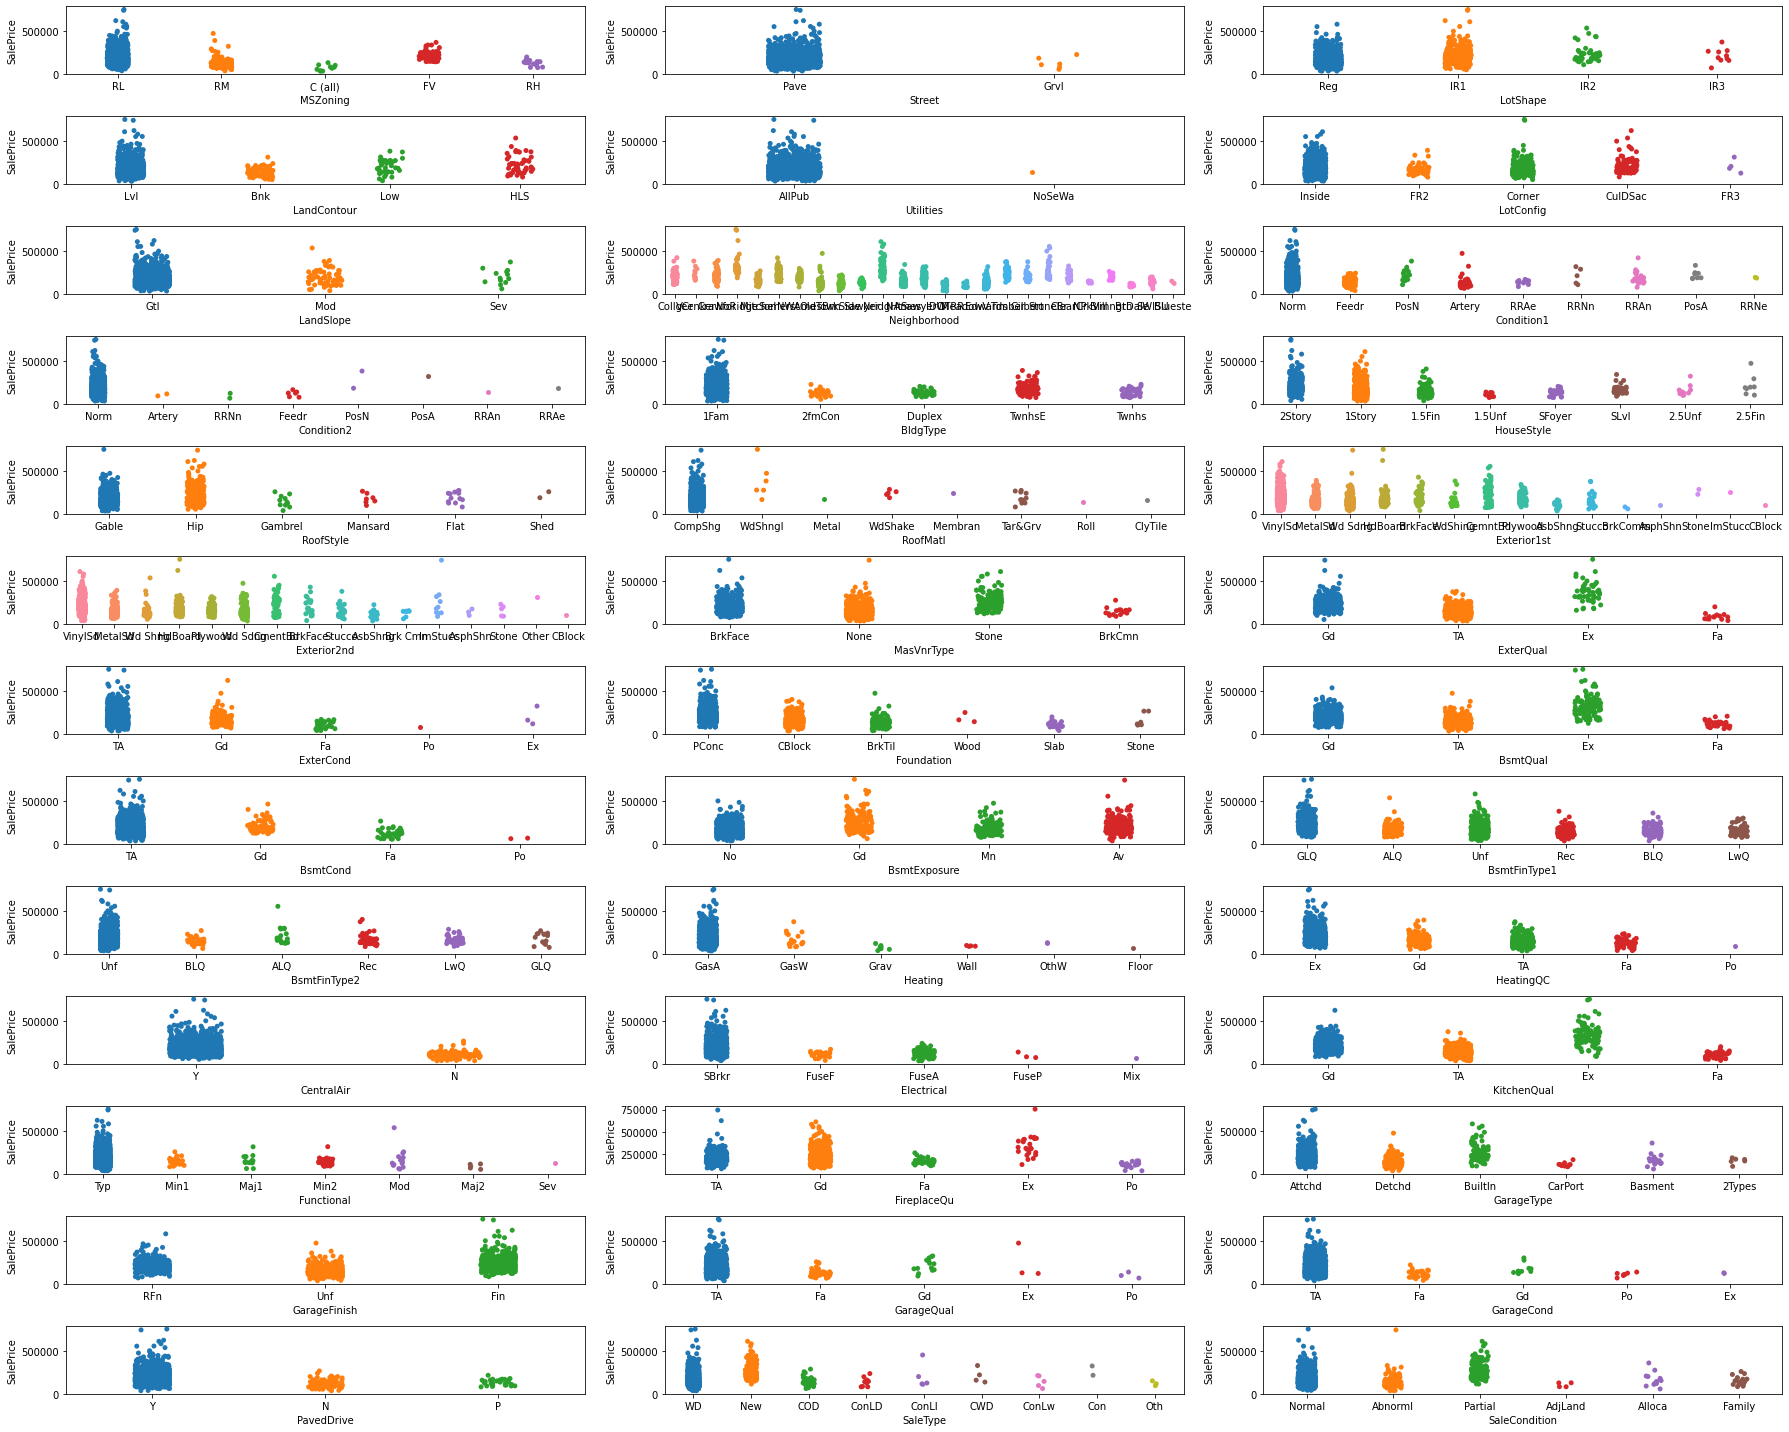

In [33]:
fig, axes = plt.subplots(13, 3, figsize=(25, 20))
axes = axes.flatten()
for i, col in enumerate(category_columns):
    sns.stripplot(x=col, y='SalePrice', data=train, ax=axes[i])
plt.tight_layout()
plt.show()

### Feature Engineering 特征工程

In [36]:
# 统计train中哪些列包含NaN
train_nan_num = [] #train中数值类型的lie
train_nan_cat = [] # train中分类类型的列

for col in number_columns:
    if train[col].isnull().sum() > 0:
        train_nan_num.append(col)

for col in category_columns:
    if train[col].isnull().sum() > 0:
        train_nan_cat.append(col)

In [37]:
len(train_nan_num)

3

In [38]:
len(train_nan_cat)

12

In [39]:
# 统计 test中有哪些列包含NaN
test_nan_num = [] # test中数值类型的列
test_nan_cat = [] # test中分类类型的列

# 注意：需要将SalePrice清理，因为test中没有SalePrice
number_columns.remove('SalePrice')

for col in number_columns:
    if test[col].isnull().sum() > 0:
        test_nan_num.append(col)

for col in category_columns:
    if test[col].isnull().sum() > 0:
        test_nan_cat.append(col)

In [40]:
len(test_nan_num)

11

In [41]:
len(test_nan_cat)

18

### 针对空缺值的处理方式

#### 1 简单粗暴：直接删除

In [43]:
train_one = train.dropna(axis=0)
test_one = test.dropna(axis=0)
print(train_one.shape)
print(test_one.shape)

(583, 77)
(562, 76)


#### 2 折中法：对于数值类型列，去中位数；对于分类类型的列取None

In [45]:
#train
for col in train_nan_num:
    train[col].fillna(train[col].median(), inplace=True) # 中位数代替

for col in train_nan_cat:
    train[col].fillna('None', inplace=True)

In [46]:
train.shape

(1460, 77)

In [47]:
# test
for col in test_nan_num:
    test[col].fillna(test[col].median(), inplace=True) # 中位数

for col in test_nan_cat:
    test[col].fillna('None', inplace=True)

In [48]:
test.shape

(1459, 76)

### 算法建模、训练、验证

#### 1 数据集分类

In [49]:
from sklearn.preprocessing import LabelEncoder

# 对分类类型 列进行LabelEncoding
# 举例：A, B, C, D, E --LabelEncoding--> 0, 1, 2, 3, 4

LE = LabelEncoder()

for col in category_columns:
    train[col] = LE.fit_transform(train[col])
    test[col] = LE.fit_transform(test[col])

In [50]:
# 构建训练集合验证集
x = train.drop(columns=['Id', 'SalePrice'], axis=1).values #说明：Id不是特征，SalePrice是标签，需要屏蔽
y = train['SalePrice'].values # 标签：SalePrice

In [52]:
from sklearn.model_selection import train_test_split

# 数据集分离
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True) #验证集占比30%，打乱顺序

In [53]:
x_train.shape

(1022, 75)

In [54]:
x_test.shape

(438, 75)

#### 2 创建回归模型

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# 1. 线性回归

'''
MSE:Mean Squared Error
均方误差是指参数估计值与参数真值之差平方的期望值;
MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度。
'''

LR = LinearRegression()
LR.fit(x_train, y_train) # 训练
y_pred = LR.predict(x_test) # 预测

print('Root Mean Squared Error :', np.sqrt(mean_absolute_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error : 0.35501159804177274


In [59]:
from sklearn.model_selection import KFold

# k折交叉验证

kf = KFold(n_splits=10) # 10折

rmse_scores = [] # 保存10折运行的结果

for train_indices, test_indices in kf.split(x): #分割元数据，生成索引
    x_train, x_test = x[train_indices], x[test_indices] # 训练集和验证集
    y_train, y_test = y[train_indices], y[test_indices] # 训练集标签和验证集标签
    # 初始化线性回归模型对象
    LR = LinearRegression(normalize=True)
    LR.fit(x_train, y_train) # 训练
    y_pred = LR.predict(x_test) # 预测
    rmse = np.sqrt(mean_absolute_error(np.log(y_test), np.log(abs(y_pred)))) # 评估
    rmse_scores.append(rmse) # 累计每一轮的验证结果

print('rmse scores : ', rmse_scores)
print(f'average rmse score : ', np.mean(rmse_scores))

rmse scores :  [0.34660399221162375, 0.32603571345946286, 0.3411883779960548, 0.3486109395923062, 0.3394767862980409, 0.3200562799193967, 0.5417145286150582, 0.3472145201249748, 0.35009594769465396, 0.3242215687567641]
average rmse score :  0.3585218654668336


In [62]:
from sklearn.ensemble import RandomForestRegressor

# 2. 随机森林（回归）

# k折交叉验证
kf = KFold(n_splits=10)
rmse_scores = []

for train_indices, test_indices in kf.split(x):
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    RFR = RandomForestRegressor() # 基础模型
    # 训练/fit拟合
    RFR.fit(x_train, y_train)
    # 预测
    y_pred = RFR.predict(x_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计每一轮验证的结果
    rmse_scores.append(rmse)

print('rmse scores : ', rmse_scores)
print('average rmse scores: ', np.mean(rmse_scores))

rmse scores :  [16496.613287671233, 17698.089589041097, 15797.60582191781, 18511.038630136987, 19280.146506849313, 15209.756369863011, 15824.862328767125, 16609.17410958904, 19871.06369863014, 17973.929794520547]
average rmse scores:  17327.22801369863


In [64]:
# 3. lightGBM(回归)

import lightgbm as lgb

# k折交叉验证
kf = KFold(n_splits=10)

rmse_scores = []

for train_indices, test_indices in kf.split(x):
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    LGBM = lgb.LGBMRegressor() # 基模型
    # 训练/fit拟合
    LGBM.fit(x_train, y_train)
    # 预测
    y_pred = LGBM.predict(x_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

print('rmse scores : ', rmse_scores)
print(f'average rmse scores :', np.mean(rmse_scores))

rmse scores :  [15359.402748938854, 15741.737528953727, 15969.526562520143, 18894.146656718858, 18024.993613003247, 13965.125436661849, 15143.365694484835, 15078.135246736836, 19796.617026917127, 15653.692389674065]
average rmse scores : 16362.674290460956


In [65]:
# xgboot
import xgboost as xgb

# k折交叉验证
kf = KFold(n_splits=10)

rmse_scores = []

for train_indices, test_indices in kf.split(x):
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    XGBM = xgb.XGBRegressor() #基模型
    # 训练/fit拟合
    XGBM.fit(x_train, y_train)
    # 预测
    y_pred = XGBM.predict(x_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

print('rmse scores :', rmse_scores)
print(f'average rmse scores : ', np.mean(rmse_scores))

rmse scores : [16110.042059075342, 16075.209225171233, 15938.499250856165, 20021.78087542808, 18082.502969820205, 16993.78622645548, 15104.168530607876, 14330.887360873288, 22004.944402825342, 16733.29898865582]
average rmse scores :  17139.511988976883


### 模型预测

In [66]:
test.shape

(1459, 76)

In [67]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,9,4


In [68]:
# 1 选取lightGBM 算法
LGBM.fit(x, y) # 在整个数据集上训练
test_pred = LGBM.predict(test.drop('Id', axis=1).values)

In [69]:
result_df = pd.DataFrame(columns=['SalePrice'])

result_df['SalePrice'] = test_pred
result_df.to_csv('LGBM_base_model.csv', index=None, header=True)

In [70]:
result_df

,SalePrice
0,129796.526226
1,149352.852576
2,181589.899522
3,170741.853808
4,192893.792670
...,...
1454,82351.830843
1455,82605.857384
1456,156565.544353
1457,112220.993992


<AxesSubplot:>

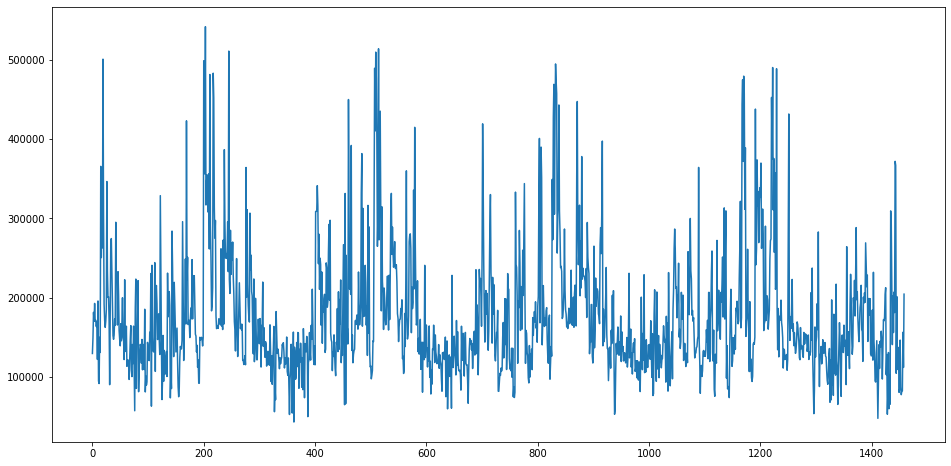

In [71]:
result_df['SalePrice'].plot(figsize=(16,8))

In [72]:
# lightGBM算法调参

train_data = lgb.Dataset(x_train, label=y_train) # 训练集
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data) # 验证集

In [73]:
# 参数
param = {
    'objective':'regression', # 目标任务
    'metric':'rmse', #评估指标
    'learning_rate':0.1, # 学习率
    'max_depth':15, # 树的深度
    'num_leaves':20, # 叶子树
}

#创建模型对象
model = lgb.train(params=param,
                  train_set=train_data,
                  num_boost_round=300,
                  early_stopping_rounds=30,
                  valid_names=['test'],
                  valid_sets=[test_data]
                  )

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3285
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 71
[LightGBM] [Info] Start training from score 181505.279300
[1]	test's rmse: 66924.6
Training until validation scores don't improve for 30 rounds
[2]	test's rmse: 61752.1
[3]	test's rmse: 57339.6
[4]	test's rmse: 52143
[5]	test's rmse: 48627.5
[6]	test's rmse: 45291.8
[7]	test's rmse: 42433.8
[8]	test's rmse: 40243.5
[9]	test's rmse: 38085.9
[10]	test's rmse: 36283.7
[11]	test's rmse: 34879.2
[12]	test's rmse: 33724.2
[13]	test's rmse: 32529.4
[14]	test's rmse: 31568.7
[15]	test's rmse: 30709.2
[16]	test's rmse: 29922.4
[17]	test's rmse: 29427.7
[18]	test's rmse: 28849.6
[19]	test's rmse: 28312.4
[20]	test's rmse: 27991.4
[21]	test's rmse: 27568.7
[22]	test's rmse: 27132.6
[23]	test's rmse: 26884.1
[24

In [74]:
score = model.best_score['test']['rmse']

score

25323.26266593107

In [75]:
test_pred = model.predict(test.drop('Id', axis=1).values)

In [76]:
result_df2 = pd.DataFrame(columns=['SalePrice'])
result_df2['SalePrice'] = test_pred
result_df2.to_csv('LGBR_model2.csv', index=None, header=True)

<AxesSubplot:>

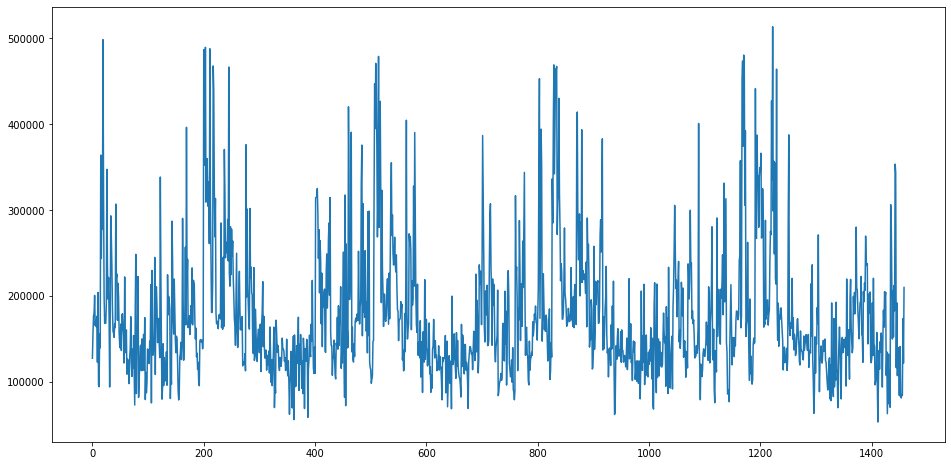

In [77]:
result_df2['SalePrice'].plot(figsize=(16, 8))